In [3]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
EnvironmentLoss = 4.2
measuredPower = -41 # For Thunderboard as a Static Beacon and the Starter Kit as a Sniffer device

def convertToDistance(inputRssiArray):
  return np.array([10**((measuredPower - rssi) / (10*EnvironmentLoss)) for rssi in inputRssiArray])

Text(0.5, 0.98, 'Distance: 150 cm -> 0 cm | Tag Orientation: 90 Degrees')

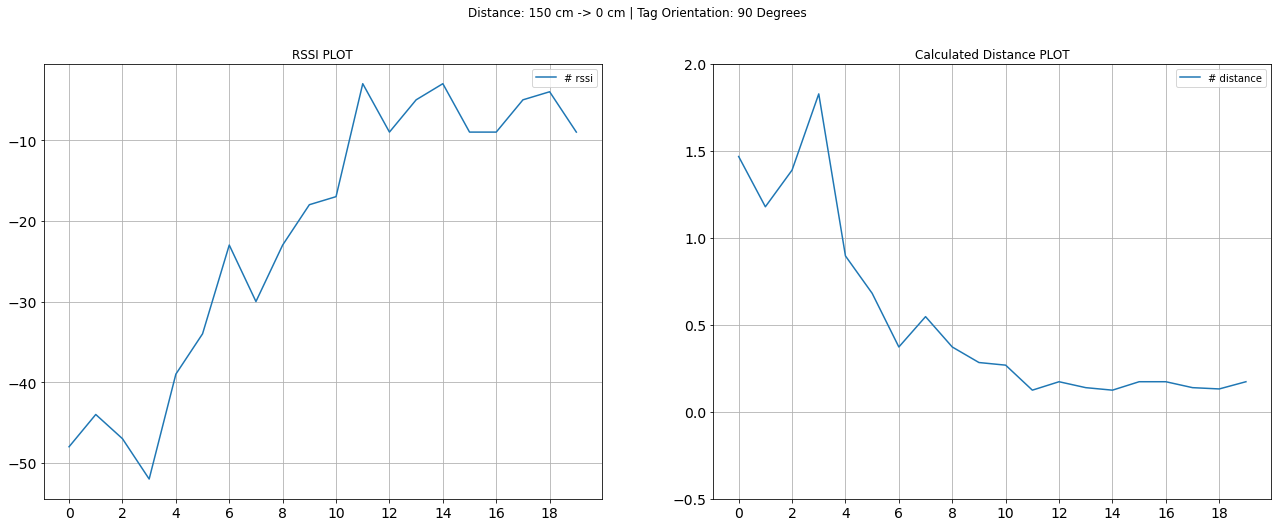

<Figure size 1440x360 with 0 Axes>

In [41]:
plt.rcParams["figure.figsize"] = (22, 8)

distance = 150
orientation = 0

fileName1 = "./Results/{}cm/{}_Degree/B1.csv".format(distance, orientation)


# making data frame
rssiData = pd.read_csv(fileName1)
distanceData = pd.DataFrame(convertToDistance(rssiData.to_numpy()), columns=['# distance'])

#define number of rows and columns for subplots
nrow = 1
ncol = 2
fig, ax = plt.subplots(1, 2)
axes = ax.flatten()
plt.figure(figsize=(20, 5))  # change the figure size as needed
rssiData.plot(ax=axes[0],  xticks=[i for i in range(0, 20, 2)], grid=True, title="RSSI PLOT", fontsize=14)
distanceData.plot(ax=axes[1], ylim=(-0.5, (distance/100)+0.5), xticks=[i for i in range(0, 20, 2)],
                  grid=True, title="Calculated Distance PLOT", fontsize=14)
fig.suptitle('Distance: {} cm -> 0 cm | Tag Orientation: {} Degrees'.format(distance,orientation))
